# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read file using pandas.

# View sample data

In [2]:
# Your code to read the dataset
df=pd.read_csv("hazelnut.csv")
df.head()
# Your code to Print sample dataset

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


# Print the shape of the pandas dataframe

In [3]:
# Print the shape of the dataframe
df.shape

(201, 12)

# Separate the dataframe into input matrix X and output vector y

In [4]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

# Import the SKlearn methods

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


# Split the data into train and test sets - X_train, X_test, y_train, y_test.

# Use test size of 40%.

## Hint: Use Sklearn function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# Your code to separate train and test sixe.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print(y_test.shape)
# Your code to Print the shapes of the X_train, X_test, y_train, y_test

(134, 11)
(67, 11)
(134,)
(67,)


# Scale the dataset between 0-1.

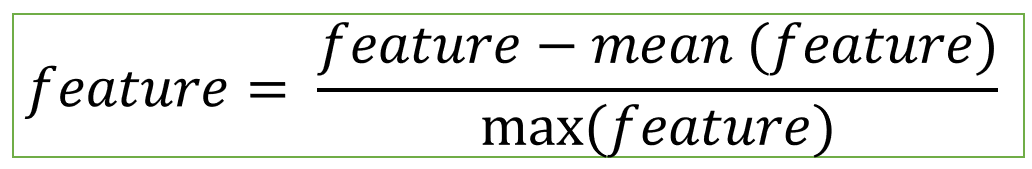

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Knn classifer using sklearn.

# Use number of neigbours as 3.

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test sample X_test.

# Print predicted values.

# Print actual test values.

# Are predicted and actual values are equal?

In [9]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta']
['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_am

# Print accuracy for training and test set.

In [10]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9850746268656716
0.9552238805970149


# Print Classification report - Precision, Recall, and F-score.

In [11]:
print (classification_report(y_test, y_pred))
knn_accuracy=accuracy_score(y_test, y_pred)

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

 c_americana       0.92      1.00      0.96        24
  c_avellana       0.94      0.89      0.92        19
   c_cornuta       1.00      0.96      0.98        24

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67

Validation Accuracy:  0.9552238805970149
None


# Display Confusion Matrix

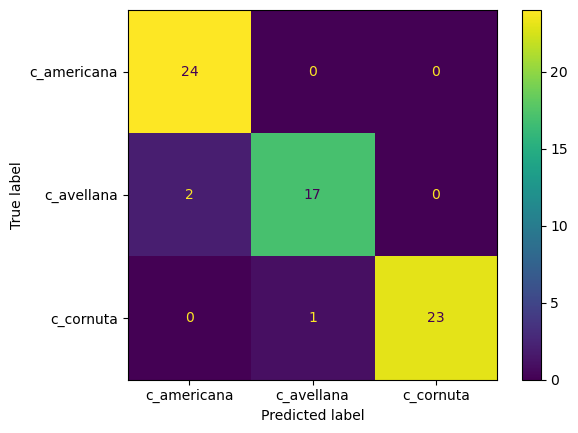

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Till now, we implemented the KNN for number of neigbours 3.
# Now, we will check the accuracy for number of neighbours 1- 10 - all values, and will plot accuracy.

In [14]:
# Your code to create an empty list train_scores
train_scores=[]

# Your code to create an empty list test_scores
test_scores=[]
# Your code to create a list neighbours having values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. You can create numpy array and use np.arange function.
neighbours=[1,2,3,4,5,6,7,8,9,10]

for neighbour in neighbours: # Your code to fill in the for loop.

  knn = KNeighborsClassifier(n_neighbors = neighbour)

  # Create a knn classifier object for particular neigbour value.

  # Fit the classifier on X_train, y_train
  knn.fit(X_train, y_train)
  # Make predictions on train data.  Store the values in train_pred variable.
  train_pred = knn.predict(X_train)
  # Make predictions on test data.  Store the values in test_pred variable.
  test_pred=knn.predict(X_test)
  # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
  train_score = accuracy_score(y_train, train_pred)
  # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
  test_score = accuracy_score(y_test, test_pred)
  # Append training accuracy in list train_scores.
  train_scores.append(train_score)
  # Append test accuracy in list test-scores.
  test_scores.append(test_score)



# Plot the accuracy for number of neigbours 1-10.

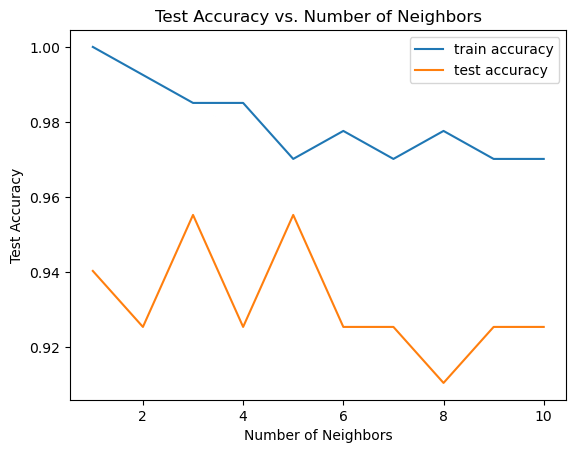

In [15]:
#
# Your code to plot neigbours vs train scores. Proivide label name as the 'train accuracy'
plt.plot(neighbours, train_scores, label='train accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs. Number of Neighbors')

# Your code to plot neigbours vs test scores. Provide label bame as the 'test accuracy'.
#
plt.plot(neighbours, test_scores, label='test accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

# Let's implement other ML algorithm that we studied -  Logistic Regression and MLP.

# We will do the same task using Logistic Regression and MLP.

## Implement Logistic Regression and MLP for the same problem and compare accuracy of the three classifiers using Bar plot:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [16]:
#
test_scores_models=[]
test_scores_models.append(test_scores[3])

In [17]:
logisticRegression = LogisticRegression(random_state=0)

logisticRegression.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [18]:


# Your code to implement Logistic regression and MLP based classifier.



# You could split this code into multiple cells

#

In [23]:
y_pred=LogisticRegression(X_test)

In [24]:
from numpy.ma.core import logical_and
print (logisticRegression.score(X_train, y_train))
print (logisticRegression.score(X_test, y_test))

0.9925373134328358
0.9552238805970149


In [25]:
test_scores_models.append(logisticRegression.score(X_test,y_test))
print(test_scores_models)

[0.9253731343283582, 0.9552238805970149, 0.9552238805970149]


In [22]:
print(classification_report(y_test, y_pred))

print("Validation Accuracy: ", accuracy_score(y_test, y_pred))

InvalidParameterError: The 'y_pred' parameter of classification_report must be an array-like or a sparse matrix. Got LogisticRegression(penalty=array([[ 0.03900614, -1.54175796, -1.13895409, -1.22907072, -1.39544204,
        -1.55053497, -0.48060946,  0.64166894, -0.75466805, -0.11809933,
        -0.53152465],
       [-1.6459564 , -0.28036122, -0.49853236, -0.1144398 , -0.48402086,
        -0.42585156, -0.42108458, -0.13340314, -0.68276184, -1.36081309,
        -0.53152465],
       [-1.55998892, -0.52556731, -0.97884866, -0.86547871, -0....
       [-1.49121494, -0.21198644,  0.09464515,  0.45528118, -0.02315128,
        -0.0380297 ,  0.4930475 , -0.6494938 , -0.6531534 , -1.12208682,
        -1.20985134],
       [-0.9066361 ,  0.57078686,  0.37023647,  0.86193694,  0.22104081,
         0.22568917,  0.49729928,  0.60297774,  0.2287552 ,  0.38010919,
         0.14680205],
       [ 0.76113294,  1.4384392 ,  1.46997707,  1.89473584,  1.47639451,
         1.4589627 ,  0.79492367, -0.4123542 ,  1.6182371 , -0.99582935,
         1.16429208]])) instead.

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

InvalidParameterError: The 'y_pred' parameter of confusion_matrix must be an array-like. Got LogisticRegression(penalty=array([[ 0.03900614, -1.54175796, -1.13895409, -1.22907072, -1.39544204,
        -1.55053497, -0.48060946,  0.64166894, -0.75466805, -0.11809933,
        -0.53152465],
       [-1.6459564 , -0.28036122, -0.49853236, -0.1144398 , -0.48402086,
        -0.42585156, -0.42108458, -0.13340314, -0.68276184, -1.36081309,
        -0.53152465],
       [-1.55998892, -0.52556731, -0.97884866, -0.86547871, -0....
       [-1.49121494, -0.21198644,  0.09464515,  0.45528118, -0.02315128,
        -0.0380297 ,  0.4930475 , -0.6494938 , -0.6531534 , -1.12208682,
        -1.20985134],
       [-0.9066361 ,  0.57078686,  0.37023647,  0.86193694,  0.22104081,
         0.22568917,  0.49729928,  0.60297774,  0.2287552 ,  0.38010919,
         0.14680205],
       [ 0.76113294,  1.4384392 ,  1.46997707,  1.89473584,  1.47639451,
         1.4589627 ,  0.79492367, -0.4123542 ,  1.6182371 , -0.99582935,
         1.16429208]])) instead.

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
MLP= MLPClassifier(random_state=1,
                   max_iter=400,
                   verbose=True,
                   )
MLP.fit(X_train,y_train)

Iteration 1, loss = 1.02442988
Iteration 2, loss = 0.98820983
Iteration 3, loss = 0.95328757
Iteration 4, loss = 0.91967990
Iteration 5, loss = 0.88738468
Iteration 6, loss = 0.85639555
Iteration 7, loss = 0.82663890
Iteration 8, loss = 0.79808574
Iteration 9, loss = 0.77077092
Iteration 10, loss = 0.74466062
Iteration 11, loss = 0.71965070
Iteration 12, loss = 0.69573321
Iteration 13, loss = 0.67294480
Iteration 14, loss = 0.65120159
Iteration 15, loss = 0.63042272
Iteration 16, loss = 0.61057525
Iteration 17, loss = 0.59164120
Iteration 18, loss = 0.57357876
Iteration 19, loss = 0.55631200
Iteration 20, loss = 0.53980112
Iteration 21, loss = 0.52400209
Iteration 22, loss = 0.50887320
Iteration 23, loss = 0.49440965
Iteration 24, loss = 0.48056816
Iteration 25, loss = 0.46731084
Iteration 26, loss = 0.45461256
Iteration 27, loss = 0.44244690
Iteration 28, loss = 0.43076242
Iteration 29, loss = 0.41954682
Iteration 30, loss = 0.40878184
Iteration 31, loss = 0.39845060
Iteration 32, los

MLPClassifier(max_iter=400, random_state=1, verbose=True)

In [29]:
y_pred=MLP.predict(X_test)
print(y_pred)


['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta']


Text(0.5, 1.0, 'Train Accuracy vs. Number of Neighbors')

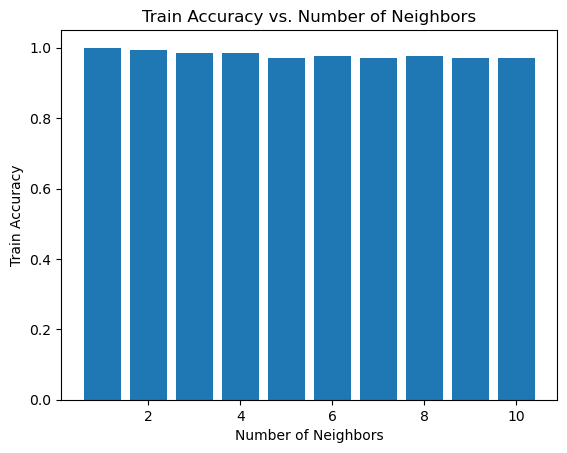

In [30]:
plt.bar(neighbours, train_scores, label='train accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs. Number of Neighbors')


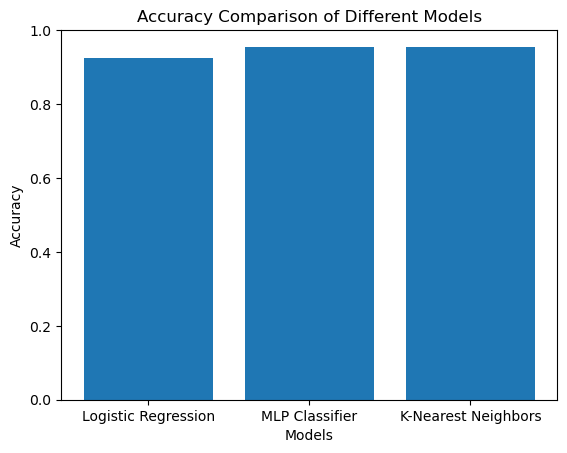

In [31]:
models = ['Logistic Regression', 'MLP Classifier', 'K-Nearest Neighbors']
accuracy = test_scores_models  # Example accuracy values for each model

plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits to ensure the accuracy values are displayed properly
plt.show()

# **Important** -  Lab logbook requirement:
# Put bar plot comparing the accracy of three models in you lablogbook.

In [32]:
test_scores_models

[0.9253731343283582, 0.9552238805970149, 0.9552238805970149]

<BarContainer object of 3 artists>

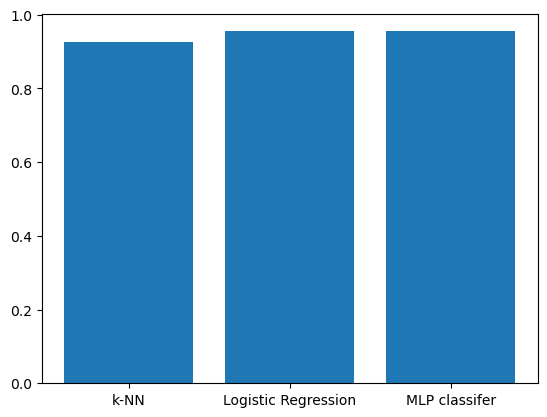

In [33]:
# Generate a bar plot to compare the accuracies of three models

models=['k-NN', 'Logistic Regression' , 'MLP classifer']
 
plt.bar(models, test_scores_models)